# Gausian beam estimates for CMB-S4

We use Goldsmith's equation 6.41, the FWHM for a truncated gaussian

$$ \theta_{fwhm} = [1.02 + 0.0135 T_e] \frac{\lambda}{D} $$

where $T_e$ is the edge taper in decibels.

The SAT values for $T_e$ come from the SAT group.  For the LATs I use MF horn simulations from Sara Simon to derive edge tapers for the MF_1 and MF_2 channels.

Still to do:  Scale those to the other LAT channels, using horn size and center frequency.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
c = 2.9979e8 # mm/sec

tels = ['sat','chlat','splat']
sat_bands =         ['LF1','LF2','MF1_1','MF2_1','MF1_2','MF2_2','HF1','HF2']
chlat_bands =       ['LF1','LF2','MF1',  'MF2',                  'HF1','HF2']
splat_bands = ['ULF','LF1','LF2','MF1',  'MF2',                  'HF1','HF2']

centers = {'ULF':20.0,'LF1':24.75,'LF2':36.5,'MF1':91.5,'MF2':148.5,'MF1_1':85.,'MF2_1':95,'MF1_2':145.,'MF2_2':155.,'HF1':227.,'HF2':285.5}

# From SAT parameters table, 3/25/2023.  LF ones are grayed out, LF_2 is <15 so I'm using 15 here.
sat_edge_tapers={'LF1':9.3,'LF2':15.,'MF1_1':8.69,'MF2_1':9.93,'MF1_2':16.58,'MF2_2':13.82,'HF1':9.93,'HF2':12.8} # dB
lat_edge_tapers={'ULF':5.,'LF1':5.,'LF2':3.,'MF1':4, 'MF2':2.,'HF1':10.,'HF2':17.} # dB


info = {}

for tel in tels:
    info[tel]={}
    if tel == 'sat':
        for band in sat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=sat_edge_tapers[band]
            info[tel][band]['D']=0.560  #mm
            # Lines below used for Si lenses.
            #if (band == 'HF1' or band == 'HF2'):
            #    info[tel][band]['D']=0.445 # mm
                
    if tel == 'chlat':
        for band in chlat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=lat_edge_tapers[band]
            info[tel][band]['D']=5.7 # meter aperture illuminated

    if tel == 'splat':
        for band in splat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=lat_edge_tapers[band]
            info[tel][band]['D']=4.8 # meter aperture illuminated

In [4]:
for tel in tels:
    print(tel + '------------')
    for band in info[tel].keys():
        D = info[tel][band]['D']
        lam = c/(info[tel][band]['center']*1e9)
        fwhm_airy = 1.028*lam/D  # This is the FWHM of the Airy pattern (1.22 is the radius of first null.)
        fwhm_airy = fwhm_airy*(60*180./np.pi)
        fwhm_goldsmith = (1.02 + 0.0135*info[tel][band]['taper'])*(lam/D) * (60*180./np.pi)
        print(band + ': Airy = {0:4.2f},  Gauss+taper = {1:4.2f}'.format(fwhm_airy,fwhm_goldsmith))

sat------------
LF1: Airy = 76.44,  Gauss+taper = 85.18
LF2: Airy = 51.83,  Gauss+taper = 61.64
MF1_1: Airy = 22.26,  Gauss+taper = 24.62
MF2_1: Airy = 19.91,  Gauss+taper = 22.36
MF1_2: Airy = 13.05,  Gauss+taper = 15.79
MF2_2: Airy = 12.21,  Gauss+taper = 14.33
HF1: Airy = 8.33,  Gauss+taper = 9.36
HF2: Airy = 6.63,  Gauss+taper = 7.69
chlat------------
LF1: Airy = 7.51,  Gauss+taper = 7.94
LF2: Airy = 5.09,  Gauss+taper = 5.25
MF1: Airy = 2.03,  Gauss+taper = 2.12
MF2: Airy = 1.25,  Gauss+taper = 1.27
HF1: Airy = 0.82,  Gauss+taper = 0.92
HF2: Airy = 0.65,  Gauss+taper = 0.79
splat------------
ULF: Airy = 11.04,  Gauss+taper = 11.67
LF1: Airy = 8.92,  Gauss+taper = 9.43
LF2: Airy = 6.05,  Gauss+taper = 6.24
MF1: Airy = 2.41,  Gauss+taper = 2.52
MF2: Airy = 1.49,  Gauss+taper = 1.51
HF1: Airy = 0.97,  Gauss+taper = 1.09
HF2: Airy = 0.77,  Gauss+taper = 0.94


# LATs

Plot Sara's MF horn sims, use those to figure out $T_e$ for each band and telescope, then use those values in Goldsmith's formula to get beam widths.

chlat
MF1: edge_val=0.72 =>  edge_dB = -1.44dB
MF2: edge_val=0.45 =>  edge_dB = -3.50dB
splat
MF1: edge_val=0.76 =>  edge_dB = -1.22dB
MF2: edge_val=0.51 =>  edge_dB = -2.97dB


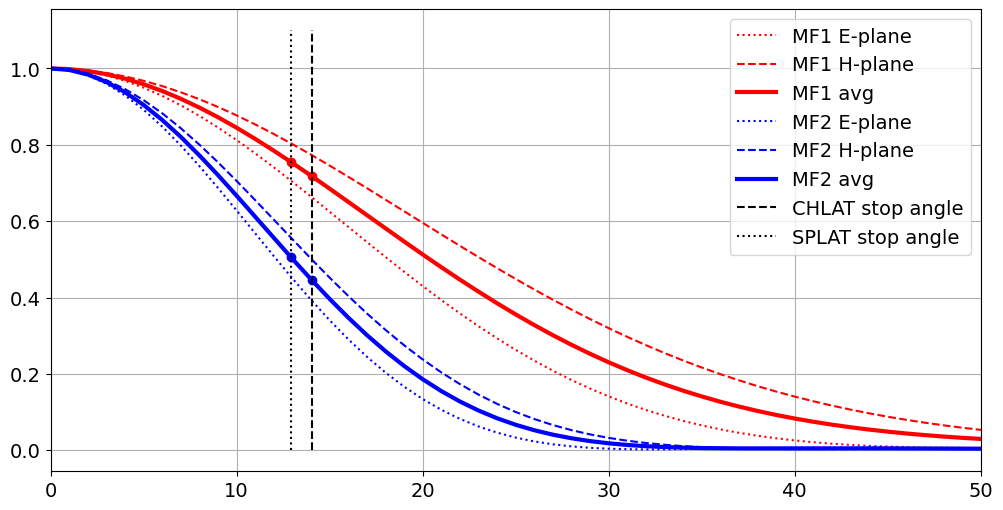

In [23]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 6]

tels = ['chlat','splat']
bands = ['MF1','MF2']

beam_info = {'chlat':{}, 'splat':{}}
beam_info['chlat']['fnum']=2.0  # estimate from Pato, March 2023
beam_info['splat']['fnum']=2.18 # New, March 2023
beam_info['chlat']['D'] = 5.5 #m
beam_info['splat']['D'] = 4.9 #m

for tel in tels:
    beam_info[tel]['MF1'] = {}
    beam_info[tel]['MF1']['center'] = 91.5
    beam_info[tel]['MF2'] = {}
    beam_info[tel]['MF2']['center'] = 148.5

beam_info['chlat']['MF1']['edge_val']= 0.718
beam_info['chlat']['MF2']['edge_val']= 0.447
beam_info['splat']['MF1']['edge_val']= 0.755
beam_info['splat']['MF2']['edge_val']= 0.505


for tel in tels:
    beam_info[tel]['theta'] = (180/np.pi)*np.arctan(1/(2*beam_info[tel]['fnum']))


beamdata = np.loadtxt('Horns/MF_v11_avg_beams.txt')
theta = np.arange(0,181)

plt.plot(beamdata[:,0],'r:',label='MF1 E-plane')
plt.plot(beamdata[:,1],'r--',label='MF1 H-plane')
plt.plot((beamdata[:,0]+beamdata[:,1])/2,'r',label='MF1 avg',linewidth=3)

plt.plot(beamdata[:,2],'b:',label='MF2 E-plane')
plt.plot(beamdata[:,3],'b--',label='MF2 H-plane')
plt.plot((beamdata[:,2]+beamdata[:,3])/2,'b',label='MF2 avg',linewidth=3)

plt.plot([beam_info['chlat']['theta'],beam_info['chlat']['theta']],[0,1.1],'k--',label='CHLAT stop angle')
plt.plot([beam_info['splat']['theta'],beam_info['splat']['theta']],[0,1.1],'k:',label='SPLAT stop angle')

plt.xlim(0,50)
#plt.ylim(.4,.8)



for tel in tels:
    print(tel)
    for band in bands:
        beam_info[tel][band]['edge_dB']=10*np.log10(beam_info[tel][band]['edge_val'])
        print('{0:s}: edge_val={1:4.2f} =>  edge_dB = {2:4.2f}dB'.format(band,beam_info[tel][band]['edge_val'],beam_info[tel][band]['edge_dB']))

for tel in tels:
    for band in bands:
        if band=='MF1':
            pointcolor = 'red'
        else:
            pointcolor = 'blue'
        plt.scatter(beam_info[tel]['theta'],beam_info[tel][band]['edge_val'],color=pointcolor)
        
        beam_info[tel][band]


plt.legend()
plt.grid()
plt.show()

# Get beam widths
in arcminutes

# Integrate those LAT-MF horn patterns to get spillover as a function of angle.

We note that the 2D integral of the beam function $B(\theta)$ is

$$ P(\theta_0) = 2 \pi \int_0^\theta_0 \theta B(\theta) $$

We'll normalize that such that the integral for the largest value of $\theta_0$ is one. 


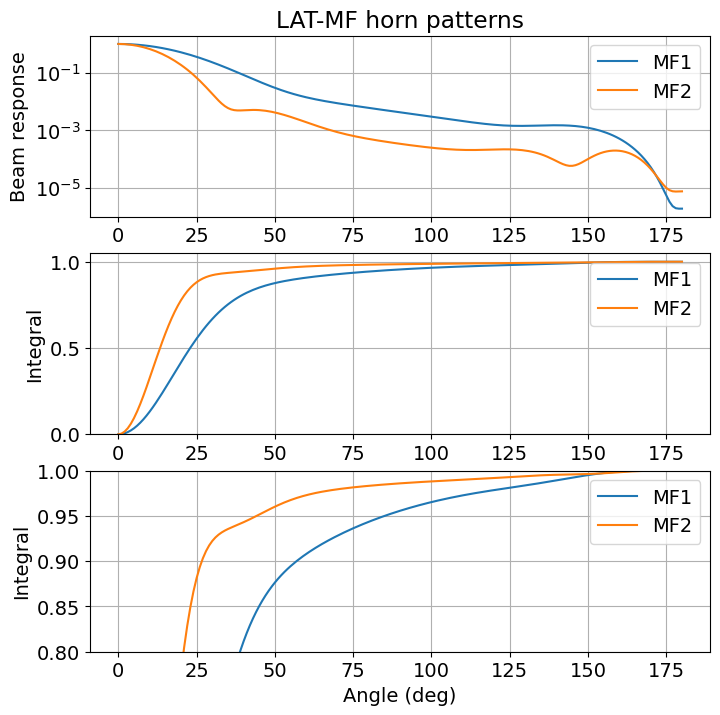

In [55]:
MF1_avg_beam = (beamdata[:,0]+beamdata[:,1])/2
MF2_avg_beam = (beamdata[:,2]+beamdata[:,3])/2
theta_deg = np.arange(0,181)
theta_rad = np.radians(theta_deg)

P1 = spi.cumulative_trapezoid(2*np.pi*theta_rad*MF1_avg_beam,theta_rad,initial=0)
P1 = P1/np.max(P1)

P2 = spi.cumulative_trapezoid(2*np.pi*theta_rad*MF2_avg_beam,theta_rad,initial=0)
P2 = P2/np.max(P2)


plt.clf()
plt.rcParams['figure.figsize'] = [8, 8]



plt.subplot(3,1,1)
plt.semilogy(theta_deg,MF1_avg_beam,label='MF1')
plt.semilogy(theta_deg,MF2_avg_beam,label='MF2')
plt.ylabel('Beam response')
plt.legend()
plt.title('LAT-MF horn patterns')
plt.grid()

plt.subplot(3,1,2)
plt.plot(theta_deg,P1,label='MF1')
plt.plot(theta_deg,P2,label='MF2')
plt.ylim(0,1.05)
plt.ylabel('Integral')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(theta_deg,P1,label='MF1')
plt.plot(theta_deg,P2,label='MF2')
plt.ylim(0.8,1)
plt.ylabel('Integral')
plt.xlabel('Angle (deg)')
plt.legend()
plt.grid()


plt.show()





In [57]:
np.degrees(np.arctan(30/25))

50.19442890773481

In [13]:
for tel in tels:
    print('\n'+tel + '------------')
    for band in bands:
        D = beam_info[tel]['D']
        lam = c/(beam_info[tel][band]['center']*1e9)
        fwhm_airy = 1.028*lam/D  # This is the FWHM of the Airy pattern (1.22 is the radius of first null.)
        fwhm_airy = fwhm_airy*(60*180./np.pi)
        fwhm_goldsmith = (1.02 + 0.0135*beam_info[tel][band]['edge_dB'])*(lam/D) * (60*180./np.pi)
        print(band + ': Airy = {0:4.2f},  Gauss+taper = {1:4.2f}'.format(fwhm_airy,fwhm_goldsmith))


chlat------------
MF1: Airy = 2.11,  Gauss+taper = 2.05
MF2: Airy = 1.30,  Gauss+taper = 1.23

splat------------
MF1: Airy = 2.36,  Gauss+taper = 2.31
MF2: Airy = 1.46,  Gauss+taper = 1.39


# SAT MF beam plots
question: are the horn patterns close enough to Gaussian for the above things to work?

19.025606037568686


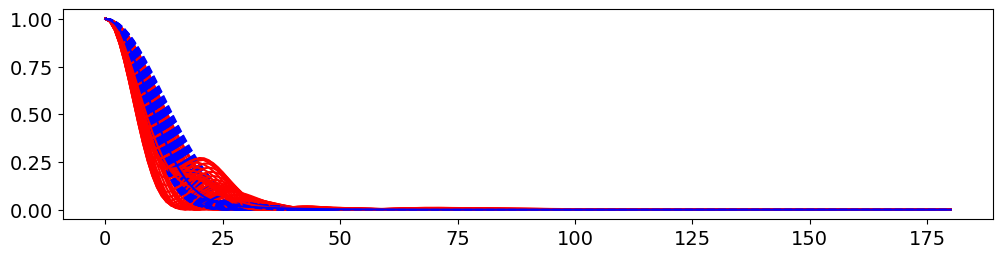

In [127]:
lowf = 84
highf = 172
MF2_1 = np.arange(84,139)
MF2_2 = np.arange(139,173)

sat_fnum = 1.45
stop_angle_rad = np.arctan(1/(2*sat_fnum))
stop_angle = (180/np.pi)*stop_angle_rad
print(stop_angle)

Eplane_1_sum = 0
Hplane_1_sum = 0
plt.subplot(2,1,1)
for ii in MF2_1:
    fname = 'beams_SATMF_2023may/file19_'+str(ii)+'_GHz.dat'
    data = np.loadtxt(fname,unpack=True)
    theta_deg = data[0,:]
    Eplane = data[1,:]**2
    Hplane = data[3,:]**2
    Eplane_1_sum += Eplane
    Hplane_1_sum += Hplane
    plt.plot(theta_deg,Eplane,'r')
    plt.plot(theta_deg,Hplane,'--b')
Eplane1 = Eplane_1_sum/np.max(Eplane_1_sum)
Hplane1 = Hplane_1_sum/np.max(Hplane_1_sum)
plt.plot(theta_deg,Eplane1,'r')
plt.plot(theta_deg,Hplane1,'b')

8.896947608766062
7.54156773230652


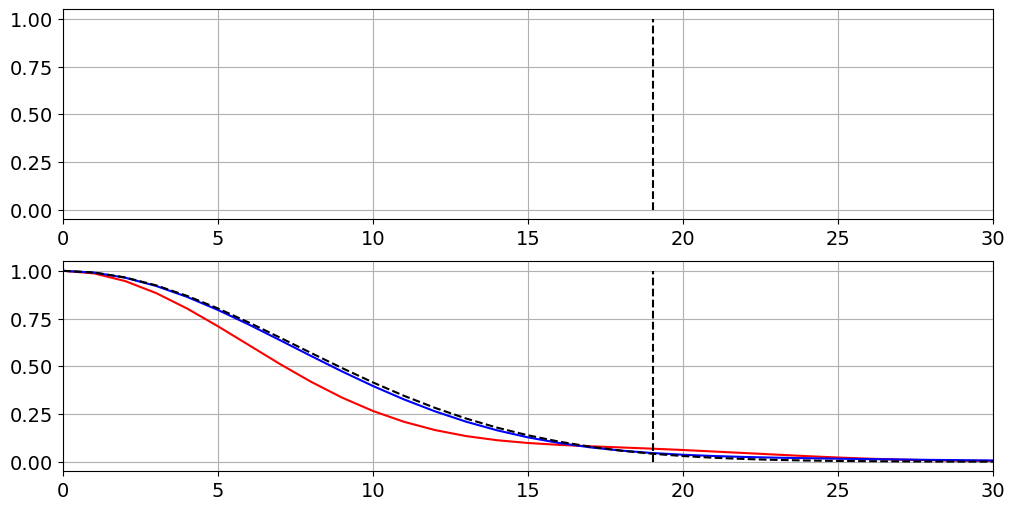

In [128]:
# 
# Plot beam with stated taper
edgetaper_dB = sat_edge_tapers['MF2_1']
edgetaper_value = 10**(-edgetaper_dB/10)
sigma = np.sqrt(stop_angle_rad**2/(-2*np.log(edgetaper_value)))
sigma_deg = sigma*180/np.pi
plt.plot(theta_deg,np.exp(-theta_deg**2/(2*sigma_deg**2)),'--k')
print(sigma_deg)

Eplane_2_sum = 0
Hplane_2_sum = 0
plt.subplot(2,1,2)
for ii in MF2_2:
    fname = 'beams_SATMF_2023may/file19_'+str(ii)+'_GHz.dat'
    data = np.loadtxt(fname,unpack=True)
    theta_deg = data[0,:]
    Eplane = data[1,:]**2
    Hplane = data[3,:]**2
    Eplane_2_sum += Eplane
    Hplane_2_sum += Hplane  
    #plt.plot(theta_deg,Eplane,'r')
    #plt.plot(theta_deg,Hplane,'--b')
Eplane2 = Eplane_2_sum/np.max(Eplane_2_sum)
Hplane2 = Hplane_2_sum/np.max(Hplane_2_sum)
plt.plot(theta_deg,Eplane2,'r')
plt.plot(theta_deg,Hplane2,'b')

# Plot beam with stated taper
edgetaper_dB = sat_edge_tapers['MF2_2']
edgetaper_value = 10**(-edgetaper_dB/10)
sigma = np.sqrt(stop_angle_rad**2/(-2*np.log(edgetaper_value)))
sigma_deg = sigma*180/np.pi
plt.plot(theta_deg,np.exp(-theta_deg**2/(2*sigma_deg**2)),'--k')
print(sigma_deg)


for ii in [1,2]:
    plt.subplot(2,1,ii)
    plt.plot([stop_angle, stop_angle],[0,1],'--k')
    plt.xlim(0,30)
    plt.grid()

In [156]:
# Make a 2D model of the illumination at the stop based on the E and H planes of this beam.
# Let's make a 1m x 1m grid, then populate it.
#
xvec = np.arange(-4.0,4.0,0.002)
yvec = xvec
screen_x, screen_y = np.meshgrid(xvec,yvec,indexing='xy')

# Pick out what parts of the beam we're going to use.  0 to 80 deg only, to avoid blowing up.
theta_rad = theta_deg[0:80]*np.pi/180
f = sat_fnum*0.46
r_beamprofile = f*np.tan(theta_rad)
r_stop = f*np.tan(stop_angle*np.pi/180)
Ep_vec = Eplane1[0:80]
Hp_vec = Hplane1[0:80]

# Fill with the beam pattern inside the stop angle.
r_screen = np.sqrt(screen_x**2 + screen_y**2)
phi_screen = np.arctan2(screen_y,screen_x)

# Beam to use
Ep = np.empty_like(r_screen)
Hp = np.empty_like(r_screen)
for ii in range(len(xvec)):
    for jj in range(len(yvec)):
        if r_screen[ii,jj] < r_stop :
            Ep[ii,jj] = np.interp(r_screen[ii,jj],r_beamprofile,Ep_vec)
            Hp[ii,jj] = np.interp(r_screen[ii,jj],r_beamprofile,Hp_vec)
        else:
            Ep[ii,jj] = 0
            Hp[ii,jj] = 0

# use cos^2 and sin^2 because those will give the right E and H plane values, and keep stuff near center normalized,
# and go smoothly between them.
beam_screen = Ep*np.cos(phi_screen)**2 + Hp*np.sin(phi_screen)**2


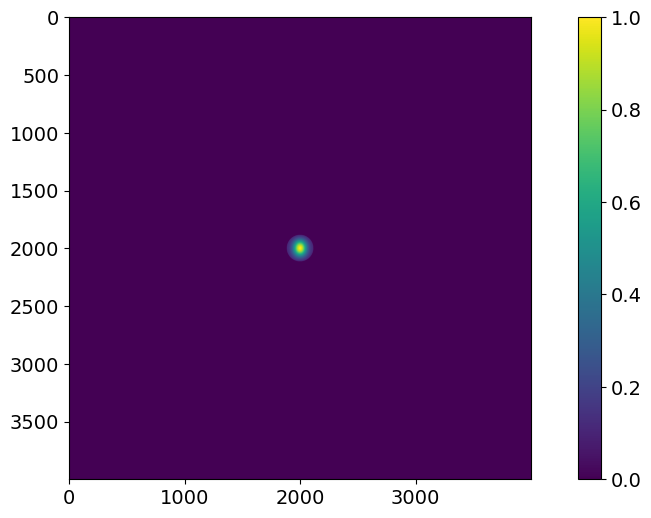

In [157]:

plt.imshow(beam_screen,interpolation=None)
#plt.xlim(1000,1500)
#plt.ylim(1000,1500)
plt.colorbar()

In [158]:
skybeam = np.fft.fftshift(np.abs(np.fft.fft2(beam_screen))**2)


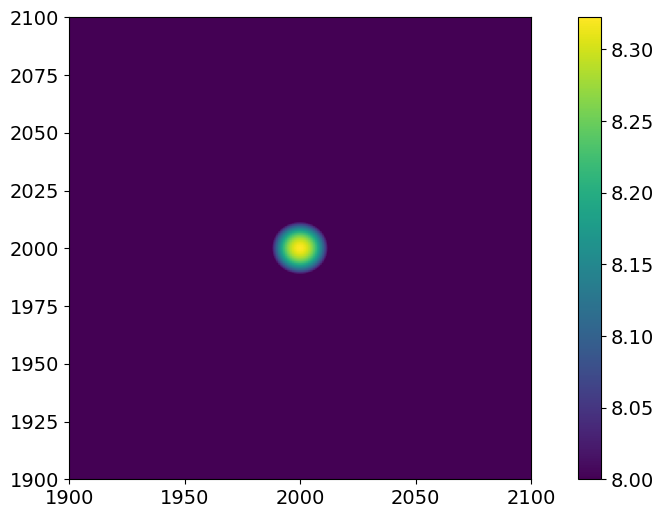

In [159]:
plt.imshow(np.log10(skybeam),vmin=8,interpolation=None)
plt.xlim(1900,2100)
plt.ylim(1900,2100)
plt.colorbar()

(1950.0, 2050.0)

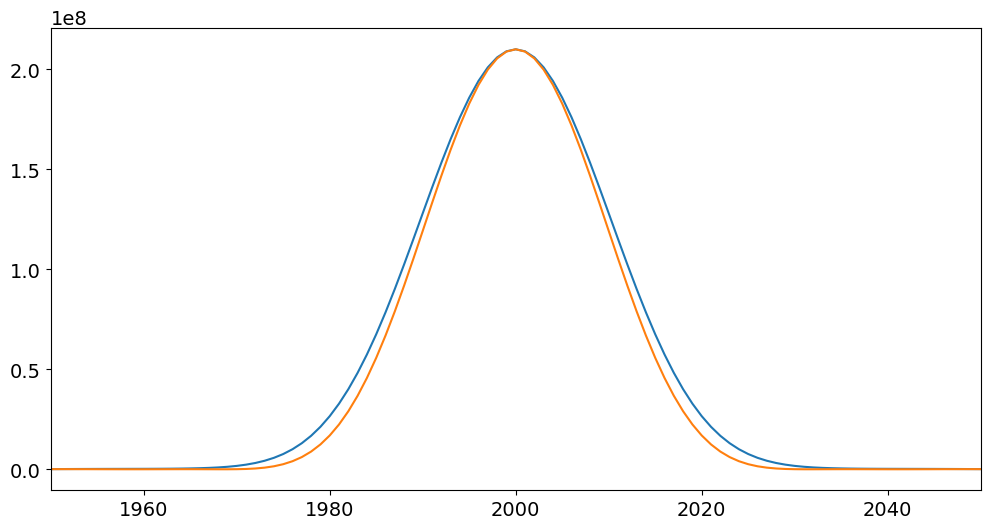

In [160]:
plt.plot(skybeam[2000,:])
plt.plot(skybeam[:,2000])
plt.xlim(1950,2050)